<a href="https://colab.research.google.com/github/jason-zl190/deeplearning/blob/master/MySRResNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
#tf.enable_eager_execution()

from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras import Model

import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np

TensorFlow 2.x selected.


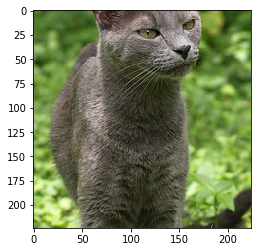

In [11]:
ds = tfds.load('oxford_iiit_pet')
dim = tf.constant([224, 224], dtype=tf.int32)
batch_size = 4
num_epochs = 5
ds_train = ds['train'].map(lambda ele: (tf.image.resize_with_crop_or_pad(ele['image'], 224, 224), ele['label']))
ds_train = ds_train.map(lambda x, y: (tf.divide(tf.cast(x, tf.float32), 255), y))
ds_train = ds_train.shuffle(buffer_size = 10 * batch_size).repeat(num_epochs).batch(batch_size)
ds_test = ds['test'].map(lambda ele: (tf.image.resize_with_crop_or_pad(ele['image'], 224, 224), ele['label']))
ds_test = ds_test.map(lambda x, y: (tf.divide(tf.cast(x, tf.float32), 255), y))
ds_test = ds_test.shuffle(buffer_size = 10 * batch_size).repeat(num_epochs).batch(batch_size)

# # ds_train = ds_train.batch(4)

for x,y in ds_train: break
plt.imshow(x[0].numpy())

In [12]:
x[0]

<tf.Tensor: id=3377, shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.30980393, 0.45882353, 0.15686275],
        [0.33333334, 0.47843137, 0.1764706 ],
        [0.34901962, 0.49411765, 0.19215687],
        ...,
        [0.27450982, 0.41960785, 0.14901961],
        [0.2784314 , 0.42745098, 0.14117648],
        [0.28627452, 0.43529412, 0.14117648]],

       [[0.29803923, 0.44705883, 0.16078432],
        [0.3137255 , 0.45490196, 0.17254902],
        [0.33333334, 0.4745098 , 0.19215687],
        ...,
        [0.28627452, 0.43529412, 0.14901961],
        [0.28627452, 0.43529412, 0.14117648],
        [0.29411766, 0.44313726, 0.14117648]],

       [[0.28627452, 0.42745098, 0.15294118],
        [0.29803923, 0.43529412, 0.16862746],
        [0.31764707, 0.4627451 , 0.19215687],
        ...,
        [0.3019608 , 0.4509804 , 0.14901961],
        [0.3019608 , 0.45490196, 0.14509805],
        [0.30980393, 0.4627451 , 0.14509805]],

       ...,

       [[0.5882353 , 0.7176471 , 0.36078432],
    

In [0]:
class MySRResNet(tf.keras.Model):
  def __init__(self):
    super(MySRResNet, self).__init__(name='')
    
    # k9n64s1
    self.conv1 = tf.keras.layers.Conv2D(64, 9, 1, padding='same')
    self.prelu1 = tf.keras.layers.PReLU(alpha_initializer='zeros')
    
    # B residual blocks
    # conv2_1, k3n64s1
    self.conv21a = tf.keras.layers.Conv2D(64, 3, 1, padding='same')
    self.bn21a = tf.keras.layers.BatchNormalization()
    self.prelu21a = tf.keras.layers.PReLU(alpha_initializer='zeros')
    self.conv21b = tf.keras.layers.Conv2D(64, 3, padding='same')
    self.bn21b = tf.keras.layers.BatchNormalization()
    
    self.x21_append = tf.keras.layers.Conv2D(64, 1, 1, padding='same', use_bias=False)
    self.bn_x21 = tf.keras.layers.BatchNormalization()

     
    # conv2_2, k3n64s1
    self.conv22a = tf.keras.layers.Conv2D(64, 3, 1, padding='same')
    self.bn22a = tf.keras.layers.BatchNormalization()
    self.prelu22a = tf.keras.layers.PReLU(alpha_initializer='zeros')
    self.conv22b = tf.keras.layers.Conv2D(64, 3, padding='same')
    self.bn22b = tf.keras.layers.BatchNormalization()
    
    self.x22_append = tf.keras.layers.Conv2D(64, 1, 1, padding='same', use_bias=False)
    self.bn_x22 = tf.keras.layers.BatchNormalization()

    # conv2_3, k3n64s1
    self.conv23a = tf.keras.layers.Conv2D(64, 3, 1, padding='same')
    self.bn23a = tf.keras.layers.BatchNormalization()
    self.prelu23a = tf.keras.layers.PReLU(alpha_initializer='zeros')
    self.conv23b = tf.keras.layers.Conv2D(64, 3, padding='same')
    self.bn23b = tf.keras.layers.BatchNormalization()
    
    self.x23_append = tf.keras.layers.Conv2D(64, 1, 1, padding='same', use_bias=False)
    self.bn_x23 = tf.keras.layers.BatchNormalization()


    # conv2_4, k3n64s1
    self.conv24a = tf.keras.layers.Conv2D(64, 3, 1, padding='same')
    self.bn24a = tf.keras.layers.BatchNormalization()
    self.prelu24a = tf.keras.layers.PReLU(alpha_initializer='zeros')
    self.conv24b = tf.keras.layers.Conv2D(64, 3, padding='same')
    self.bn24b = tf.keras.layers.BatchNormalization()
    
    self.x24_append = tf.keras.layers.Conv2D(64, 1, 1, padding='same', use_bias=False)
    self.bn_x24 = tf.keras.layers.BatchNormalization()


    # conv2_5, k3n64s1 -- end of B residual block
    self.conv25a = tf.keras.layers.Conv2D(64, 3, 1, padding='same')
    self.bn25a = tf.keras.layers.BatchNormalization()
    self.prelu25a = tf.keras.layers.PReLU(alpha_initializer='zeros')
    self.conv25b = tf.keras.layers.Conv2D(64, 3, padding='same')
    self.bn25b = tf.keras.layers.BatchNormalization()
    
    self.x25_append = tf.keras.layers.Conv2D(64, 1, 1, padding='same', use_bias=False)
    self.bn_x25 = tf.keras.layers.BatchNormalization()


    # conv3, k3n64s1
    self.conv3 = tf.keras.layers.Conv2D(64, 3, 1, padding='same')
    self.bn3 = tf.keras.layers.BatchNormalization()
    self.x3_append = tf.keras.layers.Conv2D(64, 1, 1, padding='same', use_bias=False)
    self.bn_x3 = tf.keras.layers.BatchNormalization()

    # conv4_1, k3n256s1
    self.conv41 = tf.keras.layers.Conv2D(256, 3, 1, padding='same')
    self.prelu41 = tf.keras.layers.PReLU(alpha_initializer='zeros')
    # conv4_2
    self.conv42 = tf.keras.layers.Conv2D(256, 3, 1, padding='same')
    self.prelu42 = tf.keras.layers.PReLU(alpha_initializer='zeros')

    # conv5, k9n3s1
    self.conv5 = tf.keras.layers.Conv2D(3, 9, 1, padding='same')

    # self.avgpool = tf.keras.layers.AvgPool2D(3, 2)
    # self.flatten = tf.keras.layers.Flatten()
    # self.dense = tf.keras.layers.Dense(37, activation='softmax')

    

  def call(self, input_tensor, training=False):
    input_tensor = self.conv1(input_tensor)
    input_tensor = self.prelu1(input_tensor)
    
     # B residual blocks
    # conv2_1, k3n64s1
    x = self.conv21a(input_tensor)
    x = self.bn21a(x)
    x = self.prelu21a(x)                          
    x = self.conv21b(x)                         
    x = self.bn21b(x)                 
    x_append = self.x21_append(input_tensor)
    x += x_append                   
    x21 = self.bn_x21(x)                 

     
    # conv2_2, k3n64s1
    x = self.conv22a(x21)          
    x = self.bn22a(x)               
    x = self.prelu22a(x)                 
    x = self.conv22b(x)          
    x = self.bn22b(x)                  
    x_append = self.x22_append(x21)
    x += x_append                   
    x22 = self.bn_x22(x)                 

    # conv2_3, k3n64s1
    x = self.conv23a(x22)         
    x = self.bn23a(x)                
    x = self.prelu23a(x)              
    x = self.conv23b(x)          
    x = self.bn23b(x)                
    
    x_append = self.x23_append(x22)
    x += x_append           
    x23 = self.bn_x23(x)                


    # conv2_4, k3n64s1
    x = self.conv24a(x23)           
    x = self.bn24a(x)                
    x = self.prelu24a(x)             
    x = self.conv24b(x)          
    x = self.bn24b(x)                
    
    x_append = self.x24_append(x23)
    x += x_append              
    x24 = self.bn_x24(x)                


    # conv2_5, k3n64s1 -- end of B residual block
    x = self.conv25a(x24)           
    x = self.bn25a(x)                
    x = self.prelu25a(x)             
    x = self.conv25b(x)          
    x = self.bn25b(x)                
    
    x_append = self.x25_append(x24)
    x += x_append              
    x25 = self.bn_x25(x)                


    # conv3, k3n64s1
    x = self.conv3(x25)        
    x = self.bn3(x)                
    x_append = self.x3_append(input_tensor)
    x += x_append
    x = self.bn_x3(x)      


    # conv4_1, k3n256s1
    x = self.conv41(x) 
    x = tf.nn.depth_to_space(x, block_size=2)               
    x = self.prelu41(x)             
    # conv4_2
    x = self.conv42(x)
    x = tf.nn.depth_to_space(x, block_size=2)               
    x = self.prelu42(x)             

    # conv5, k9n3s1
    x = self.conv5(x)         
    return x

model = MySRResNet()
#sgd = tf.keras.optimizers.SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
adam = tf.keras.optimizers.Adam(
    learning_rate=0.0001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    name='Adam',
)
model.compile(optimizer=adam,
              loss='mse',
              metrics=['accuracy'])

In [14]:
model(x)

<tf.Tensor: id=4864, shape=(4, 896, 896, 3), dtype=float32, numpy=
array([[[[-1.63030121e-02, -7.31688598e-03, -1.66618973e-02],
         [-7.33416807e-03,  3.09269410e-04, -2.42530927e-03],
         [-2.81869061e-03,  7.27078132e-03,  2.88592419e-04],
         ...,
         [ 2.47197133e-02, -1.19968196e-02, -1.30917495e-02],
         [-5.93405031e-03, -1.27577372e-02, -2.47377083e-02],
         [-3.90258525e-03, -1.12422854e-02,  4.25831508e-03]],

        [[-7.60688260e-03,  2.05465313e-03,  9.27515700e-03],
         [-1.13794906e-03, -1.17629832e-02, -1.50605021e-02],
         [ 7.23917224e-03,  1.11854896e-02, -8.08885694e-03],
         ...,
         [ 7.59314001e-03, -2.35023946e-02,  5.25681535e-03],
         [ 1.85672585e-02, -3.53754312e-03, -1.23064043e-02],
         [ 1.10601112e-02, -1.22578982e-02, -8.70377012e-03]],

        [[-1.74018219e-02,  1.90630406e-02, -9.16877761e-03],
         [-2.83237416e-02, -7.64838979e-03, -5.61922416e-03],
         [ 3.72225605e-03, -3.110

In [15]:
model.summary()

Model: "my_sr_res_net_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_42 (Conv2D)           multiple                  15616     
_________________________________________________________________
p_re_lu_16 (PReLU)           multiple                  3211264   
_________________________________________________________________
conv2d_43 (Conv2D)           multiple                  36928     
_________________________________________________________________
batch_normalization_34 (Batc multiple                  256       
_________________________________________________________________
p_re_lu_17 (PReLU)           multiple                  3211264   
_________________________________________________________________
conv2d_44 (Conv2D)           multiple                  36928     
_________________________________________________________________
batch_normalization_35 (Batc multiple              

In [0]:
# history = model.fit(ds_train, validation_data=ds_test, epochs=num_epochs)
# eva = model.evaluate(ds_test)

Epoch 1/5


    231/Unknown - 378s 2s/step - loss: 19.4788 - accuracy: 0.0487